In [48]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import math
from os import path
import pywt
import pycwt as wavelet

In [43]:
plt.rc('text', usetex=True)

inpath = "../../"

currentfile = "Imitator_2_2400.csv"

# Read from file
strdatatype = np.dtype([('N', np.int_, (2,)), ('Time_Count', np.int_ ), ('Mode', np.int_ ),
                            ('T', np.float_, (10,)), ('S', np.bool_, (10,)), ('System_State', np.bool_ )])
N, Time_Count, Mode, T, S, System_State = np.loadtxt(path.join(inpath, currentfile),
        unpack=True, delimiter=';', skiprows=1, dtype=strdatatype)

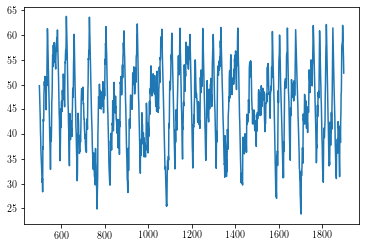

In [64]:
# print(N[:, 1])
# print(T[:, 9])
plt.plot(N[500:1900, 1], T[500:1900, 9])
plt.show()

46.32162337702863


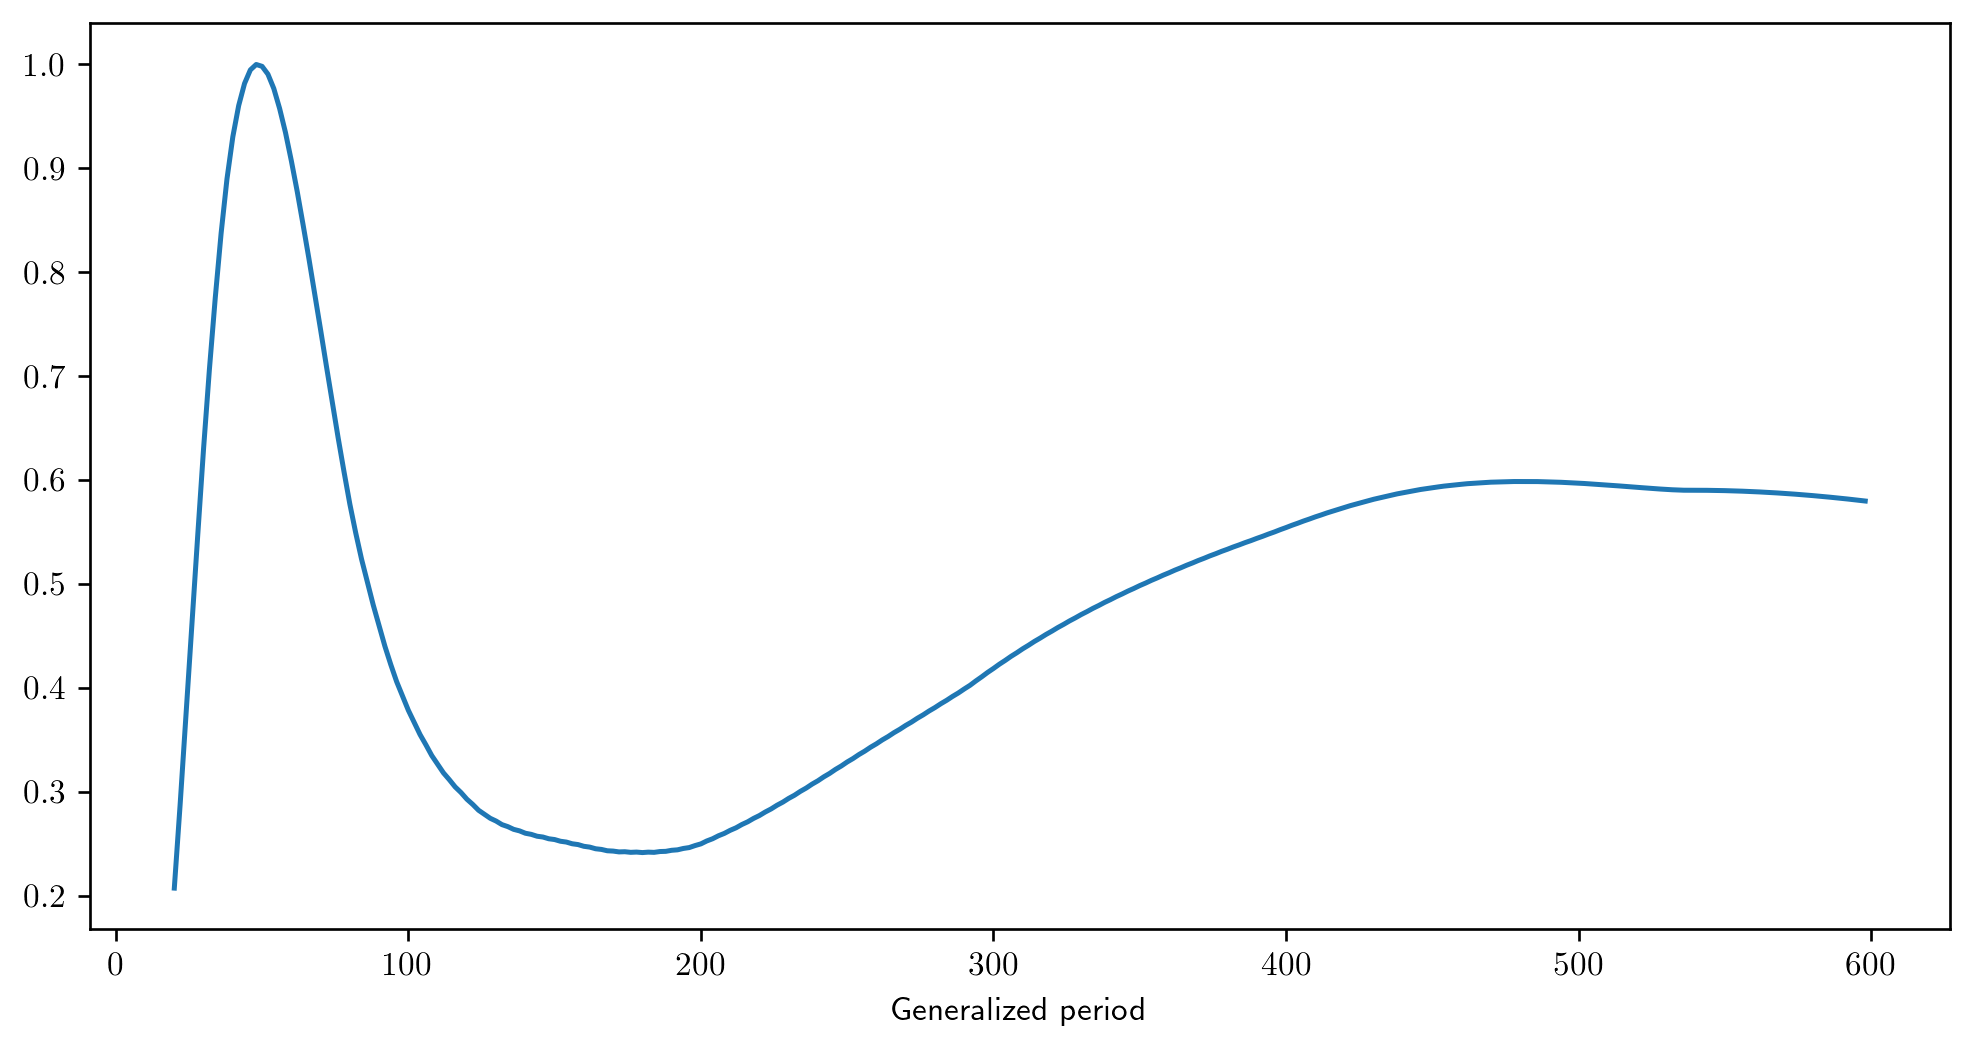

45.996273382081604


<Figure size 432x288 with 0 Axes>

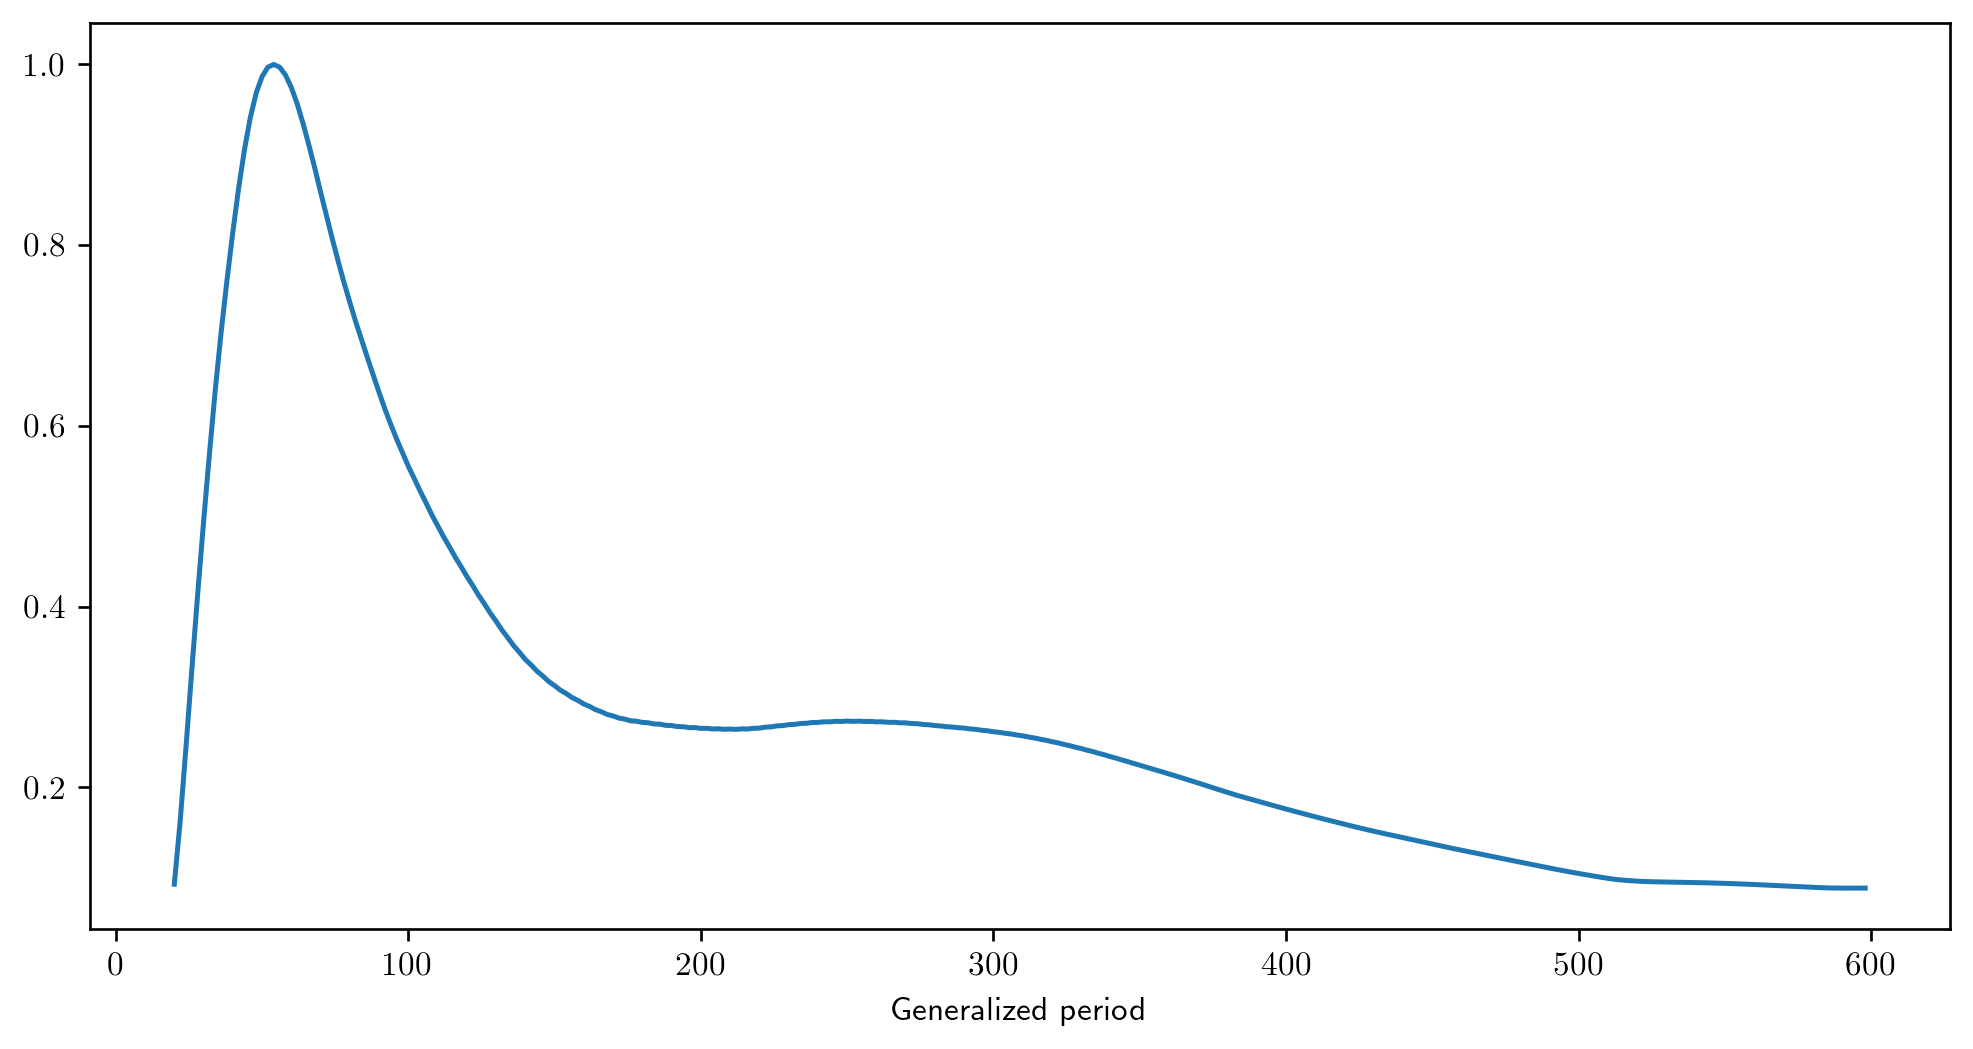

45.87217866219023


<Figure size 432x288 with 0 Axes>

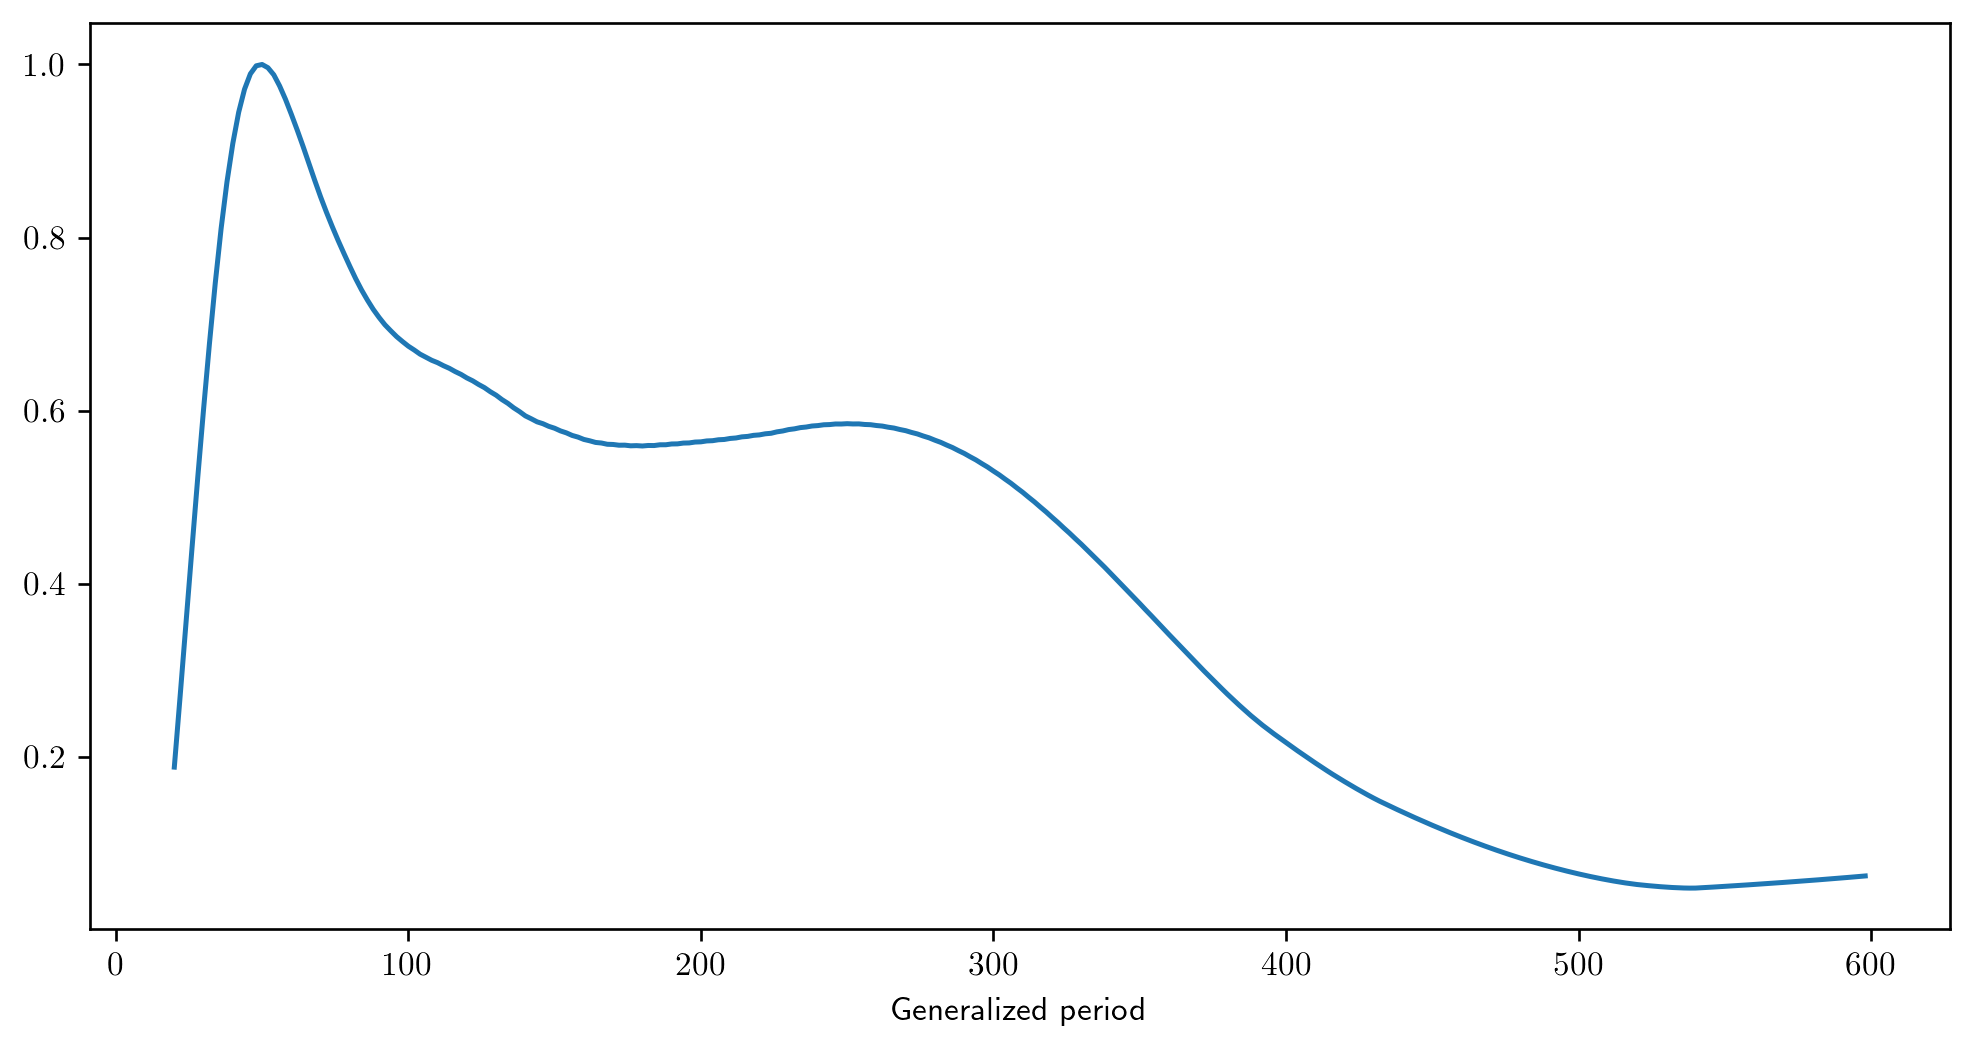

46.47000393227543


<Figure size 432x288 with 0 Axes>

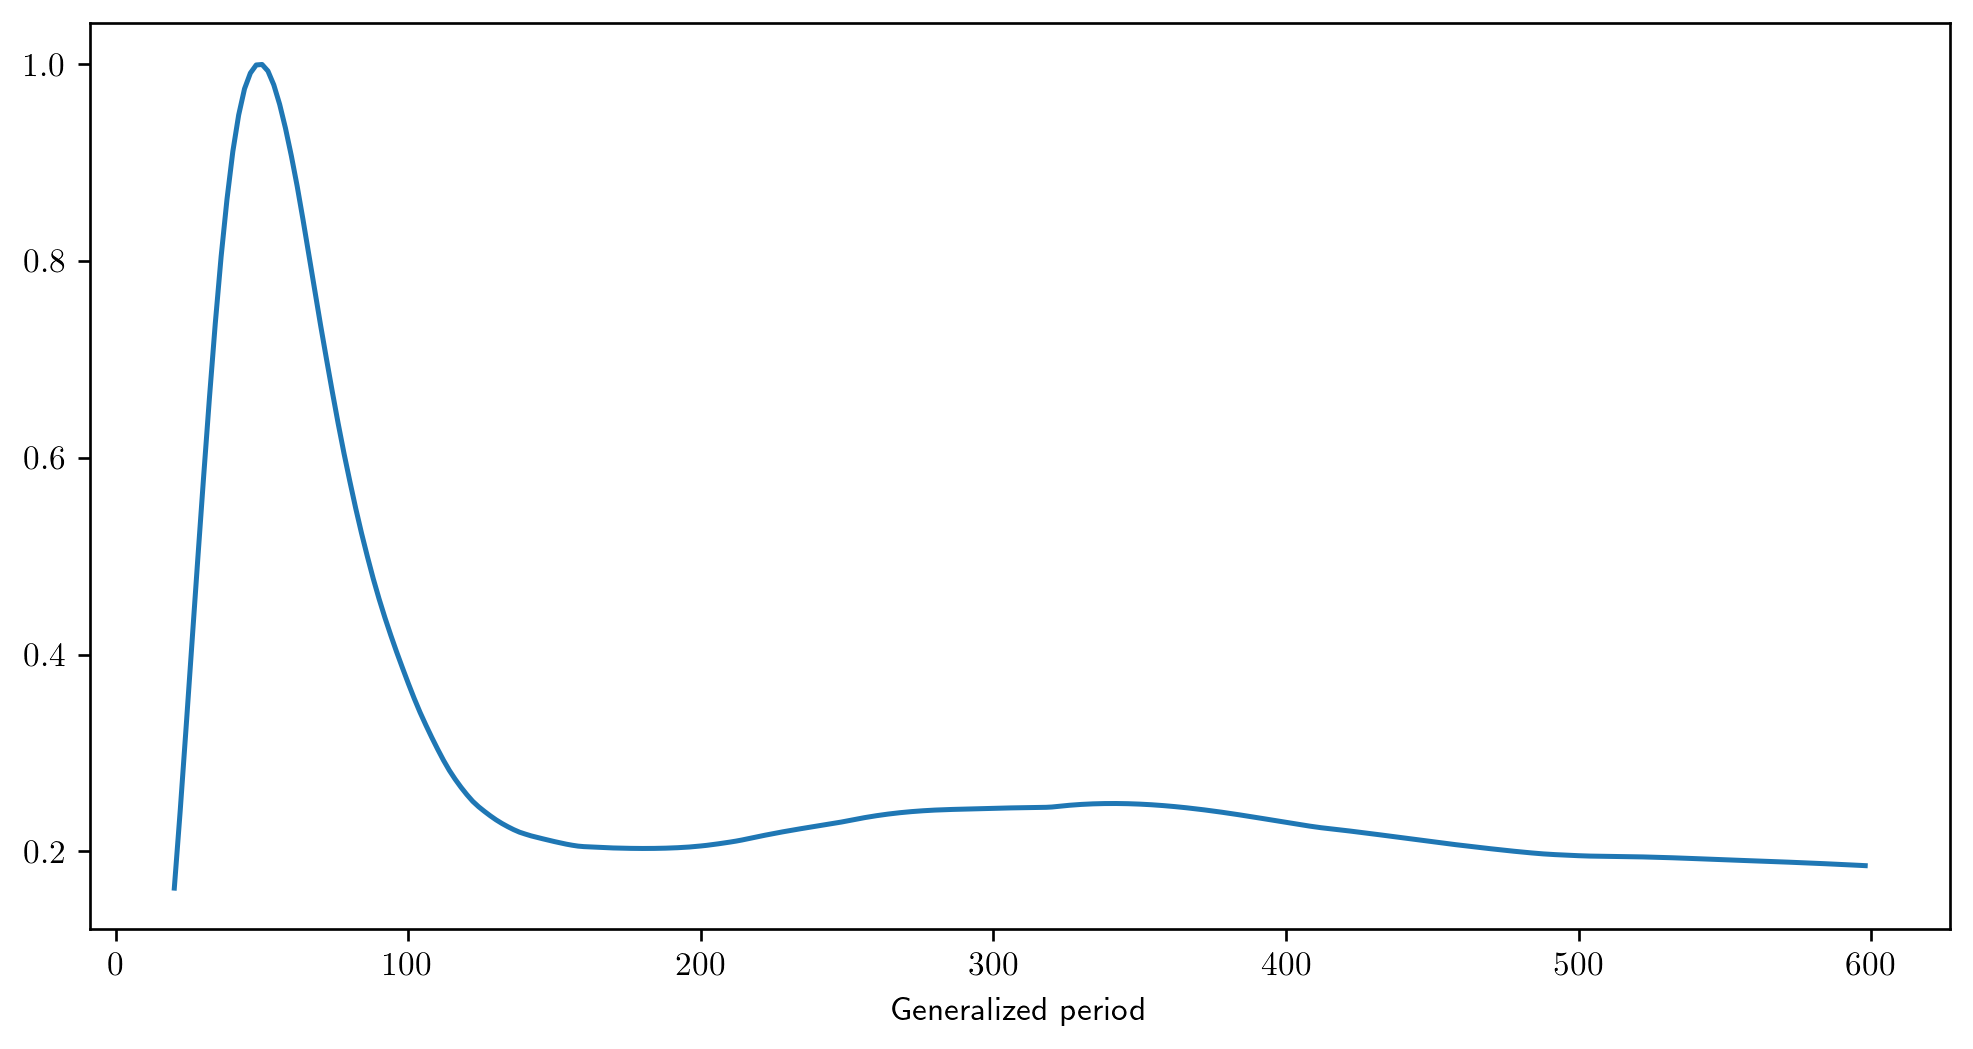

46.538704085059514


<Figure size 432x288 with 0 Axes>

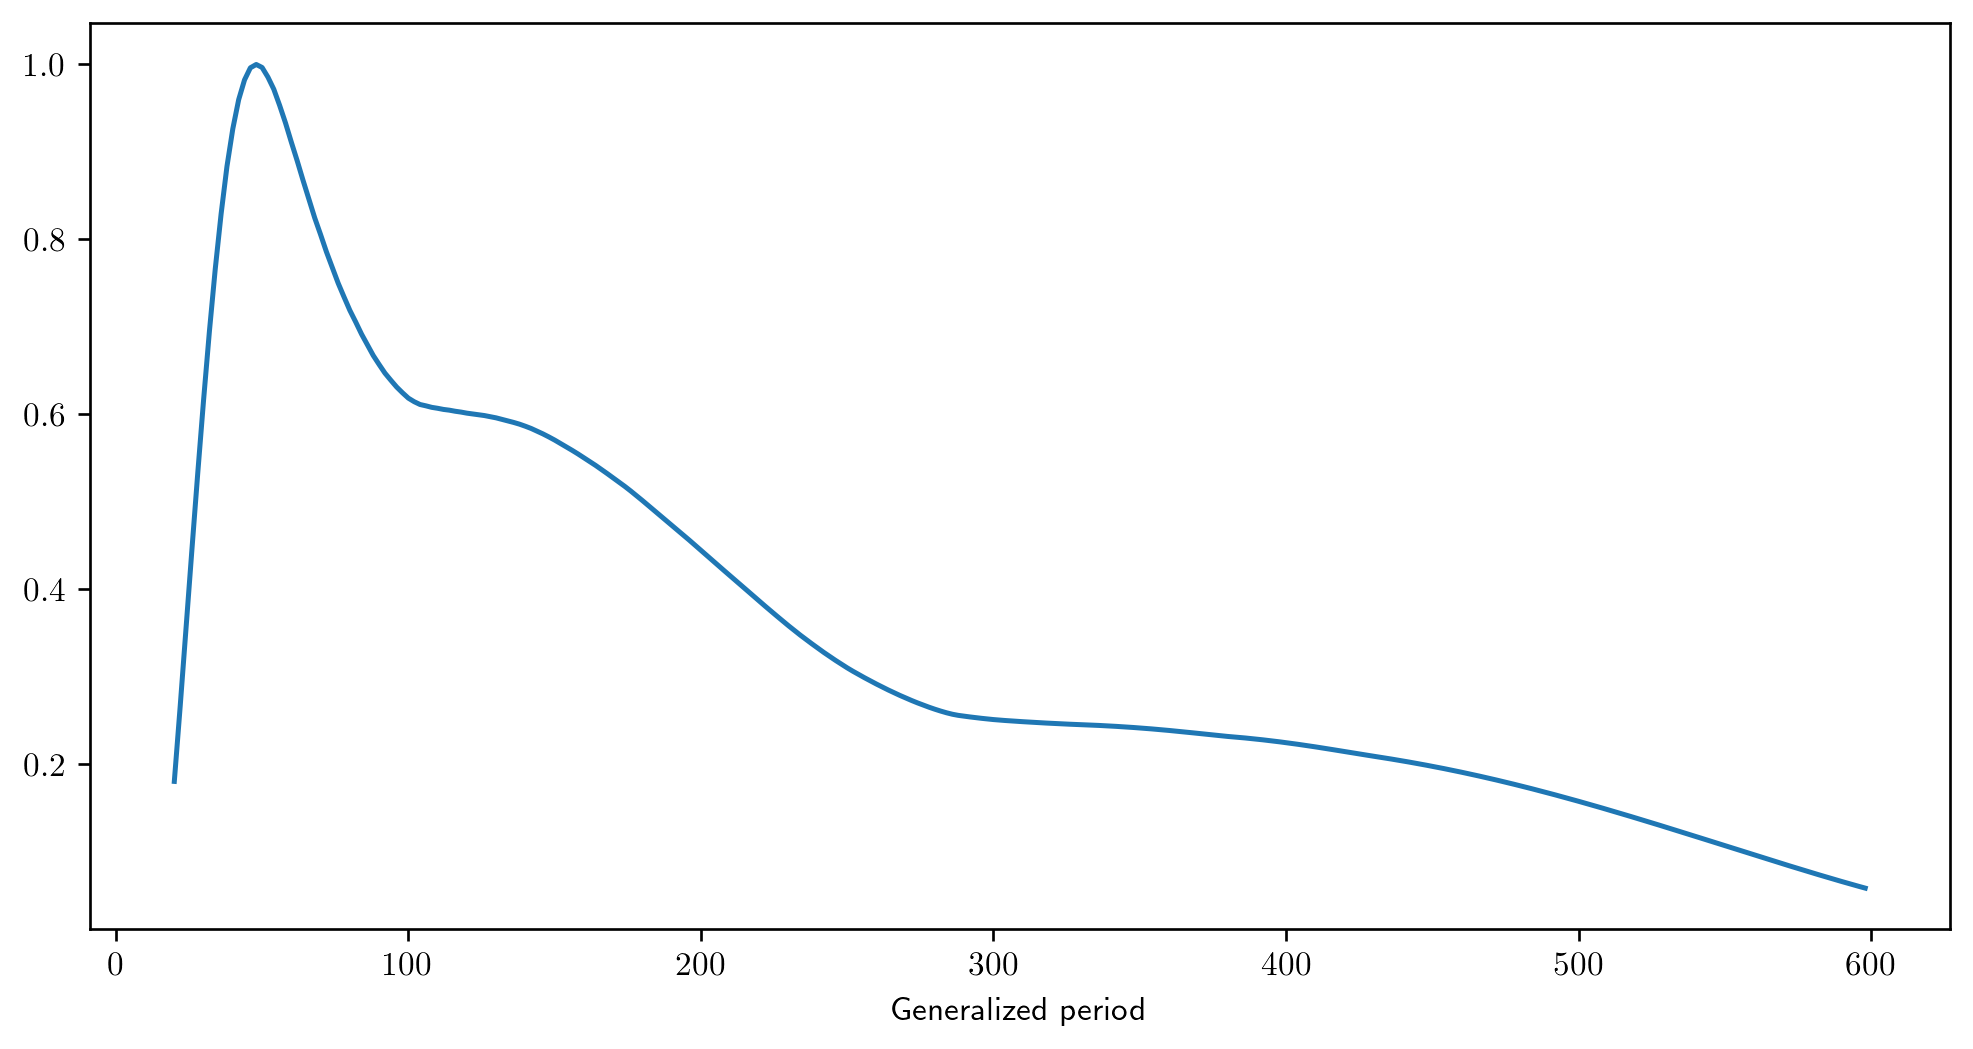

46.37245807341693


<Figure size 432x288 with 0 Axes>

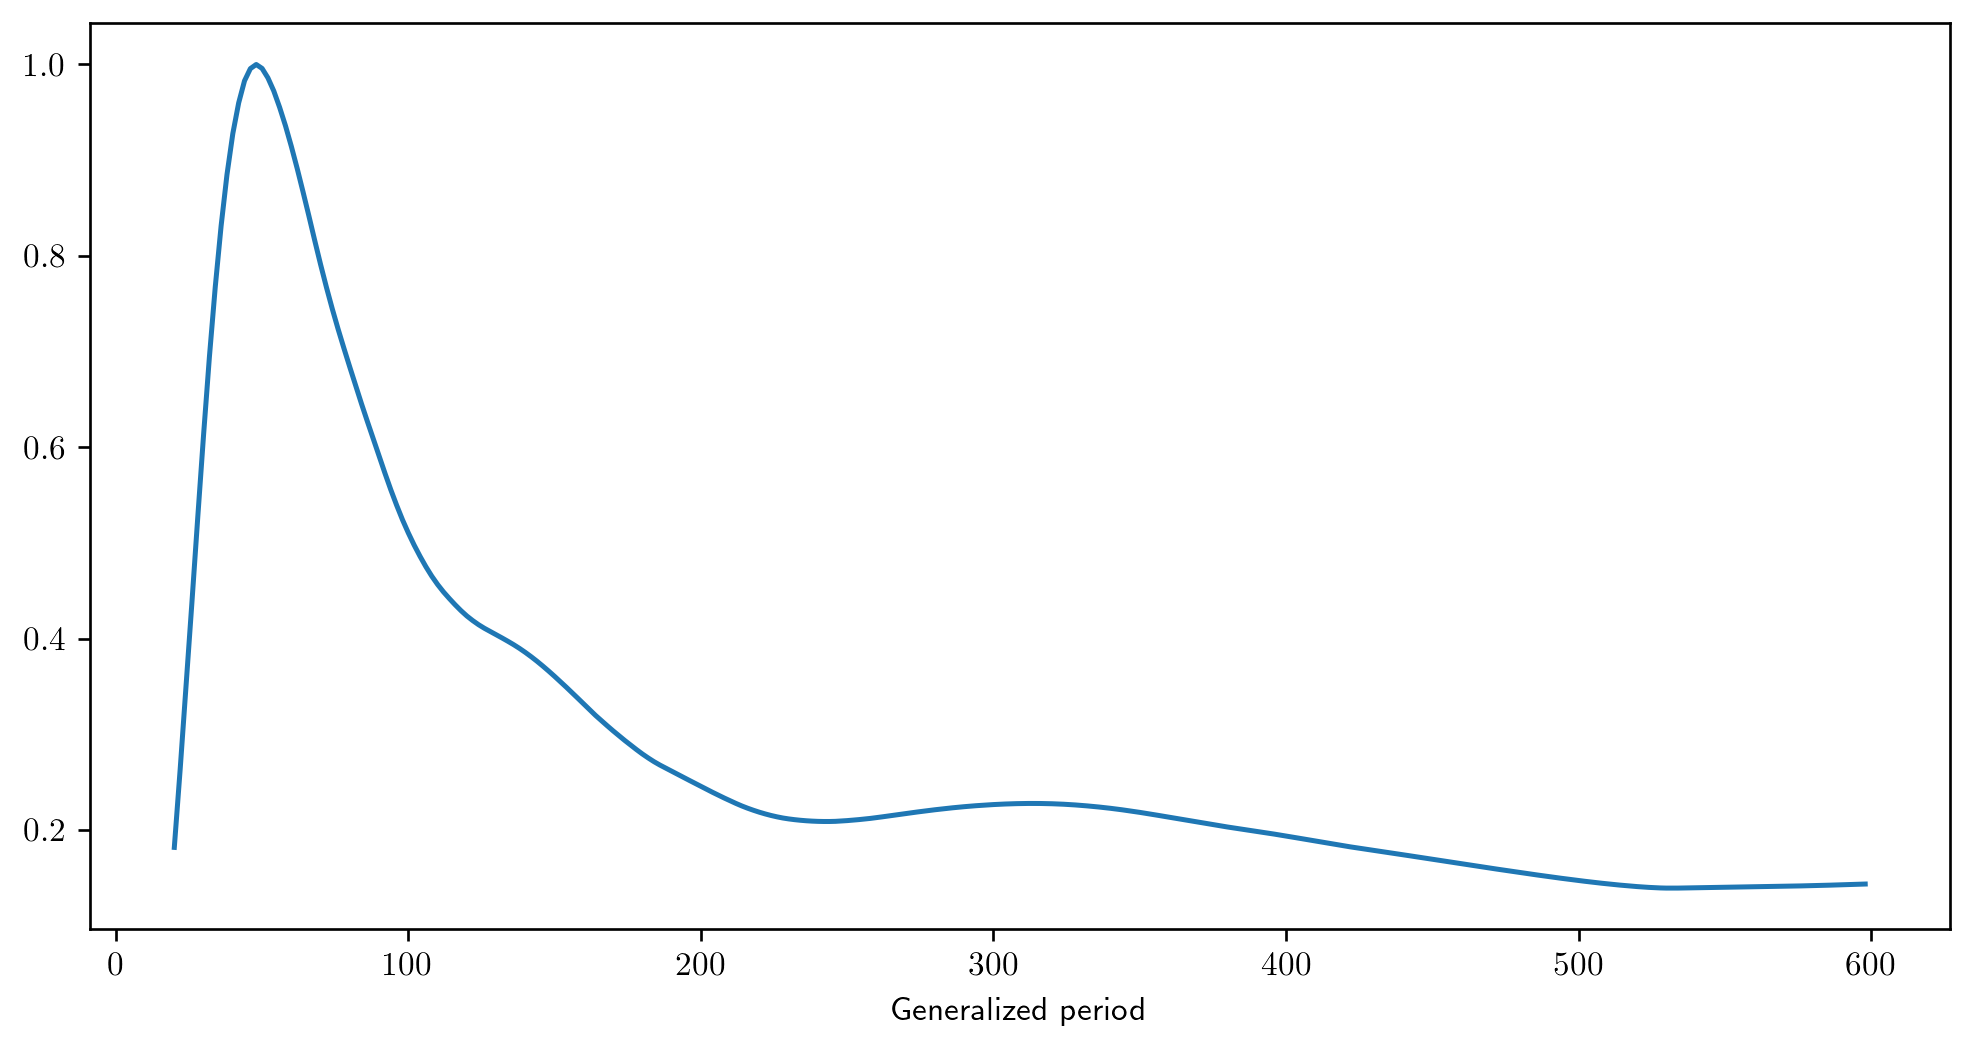

46.34850902886283


<Figure size 432x288 with 0 Axes>

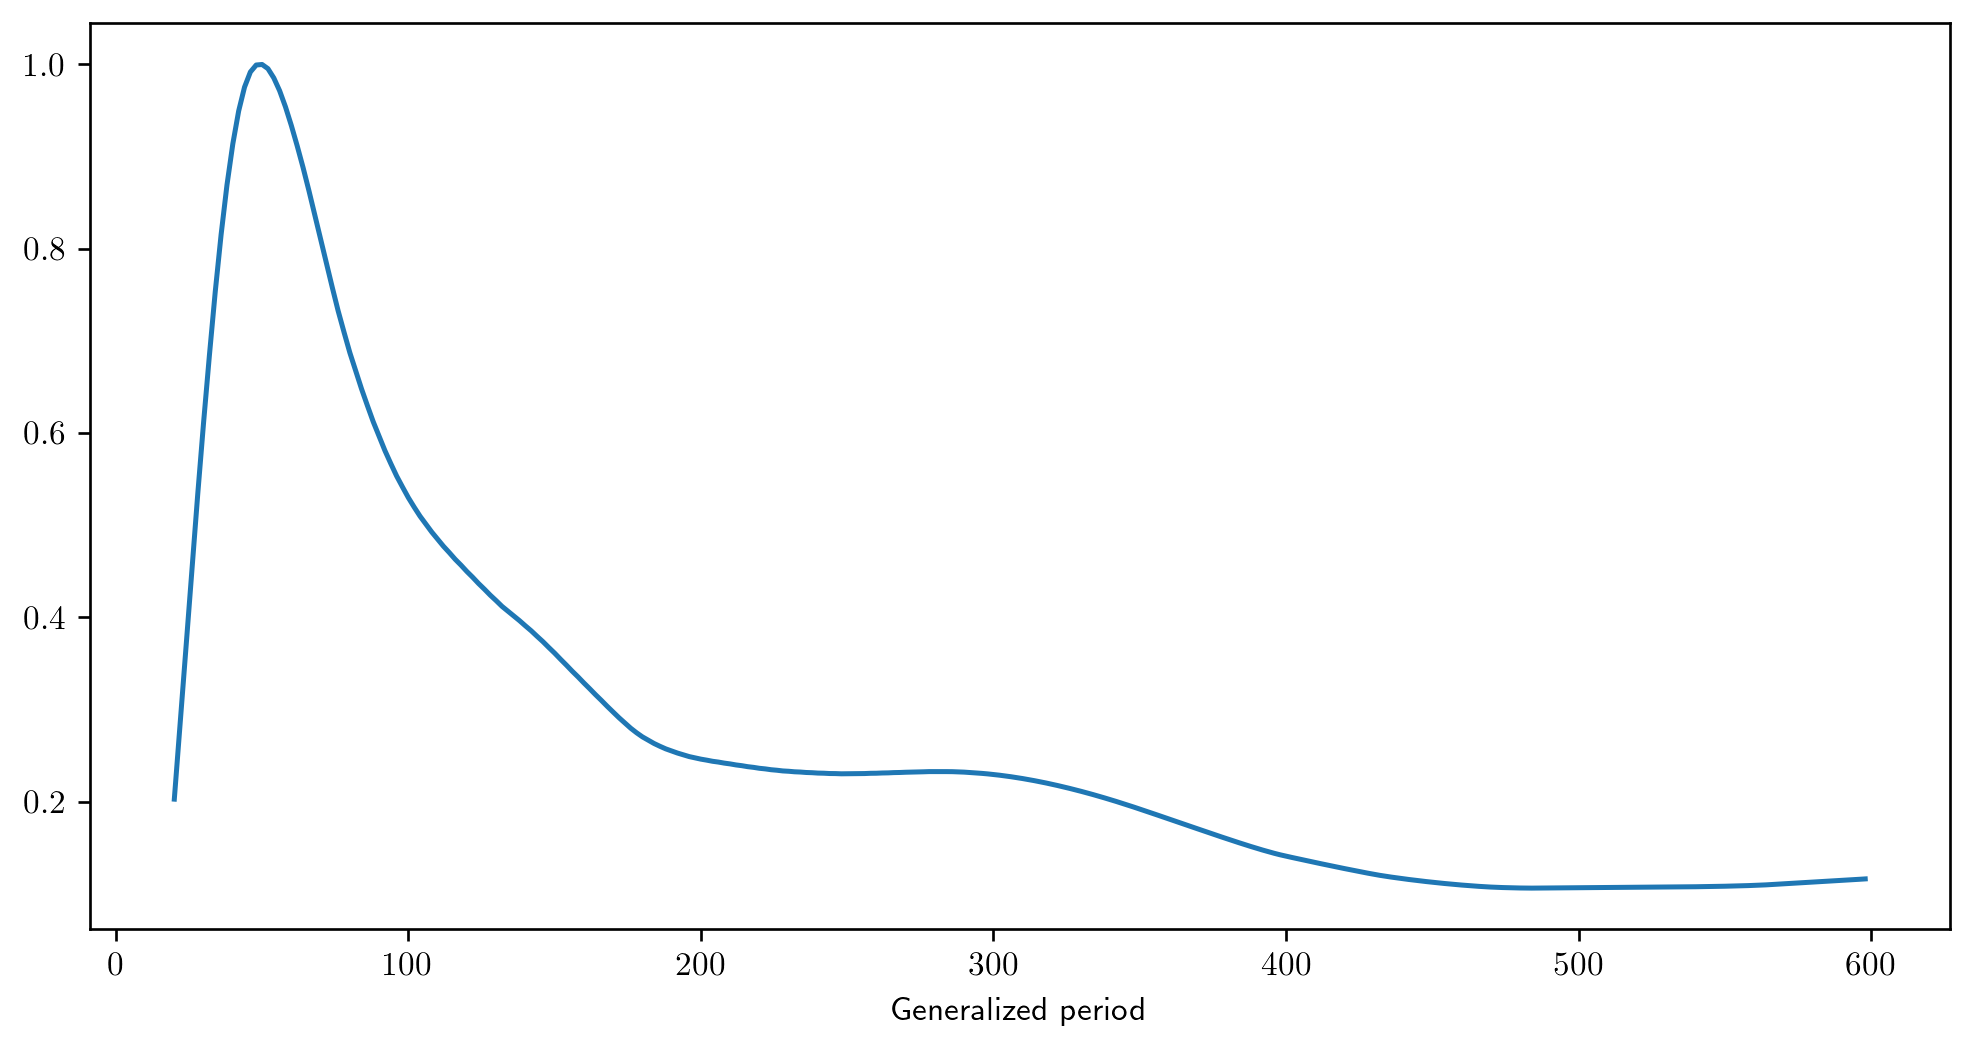

46.24557538011151


<Figure size 432x288 with 0 Axes>

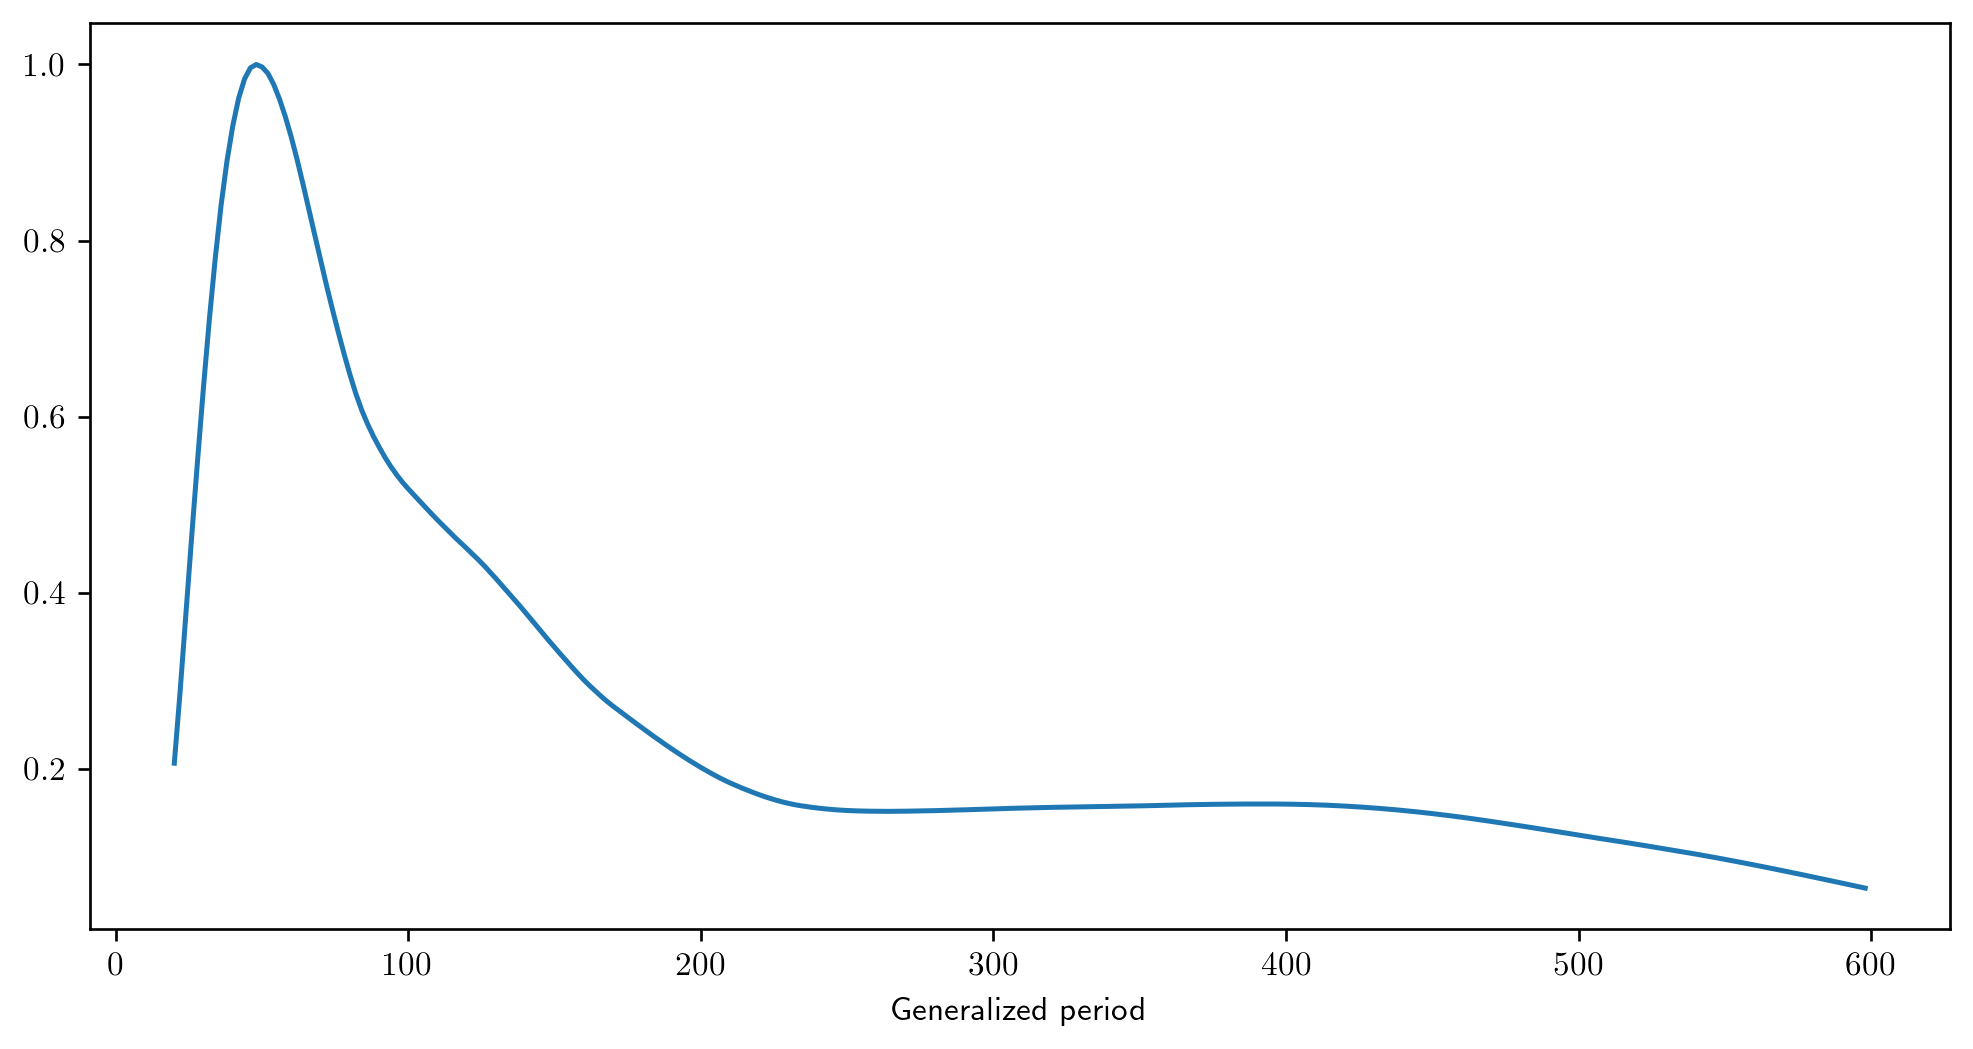

46.00398587124245


<Figure size 432x288 with 0 Axes>

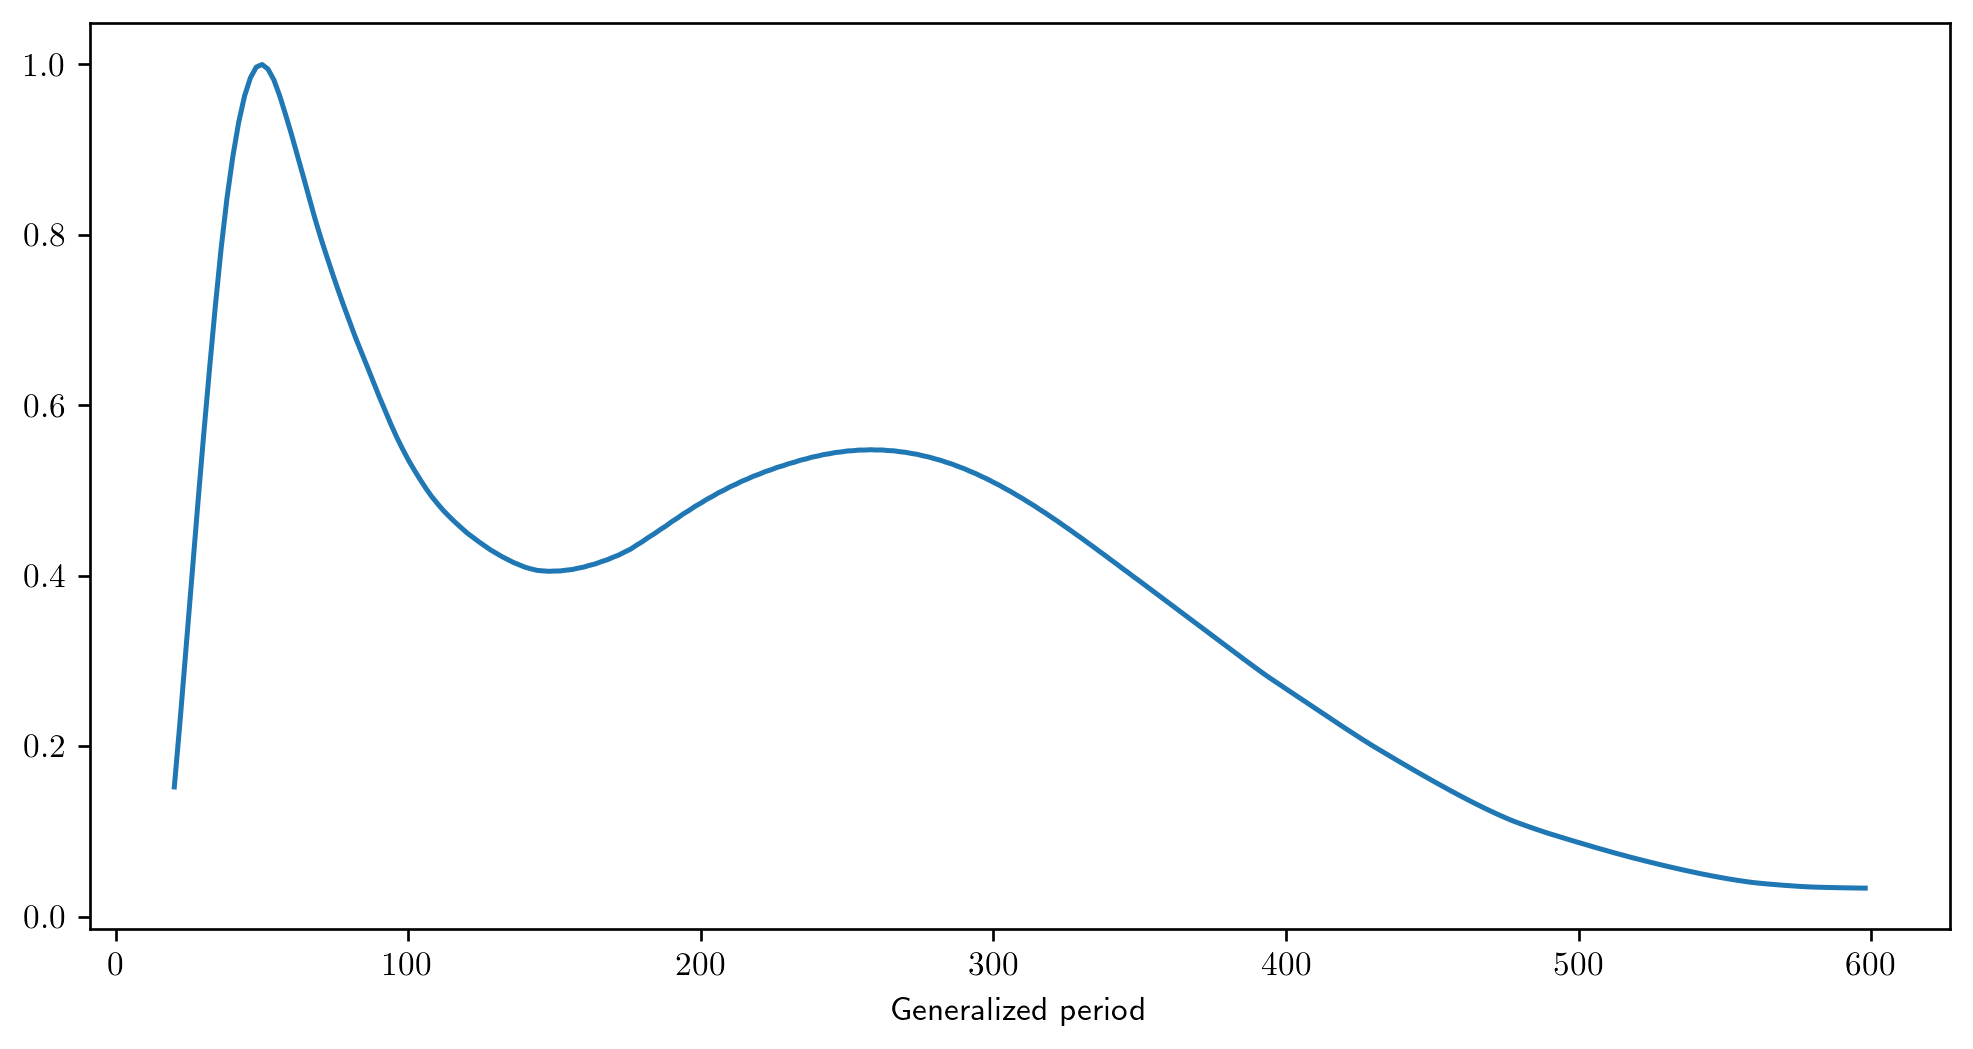

45.80112237033387


<Figure size 432x288 with 0 Axes>

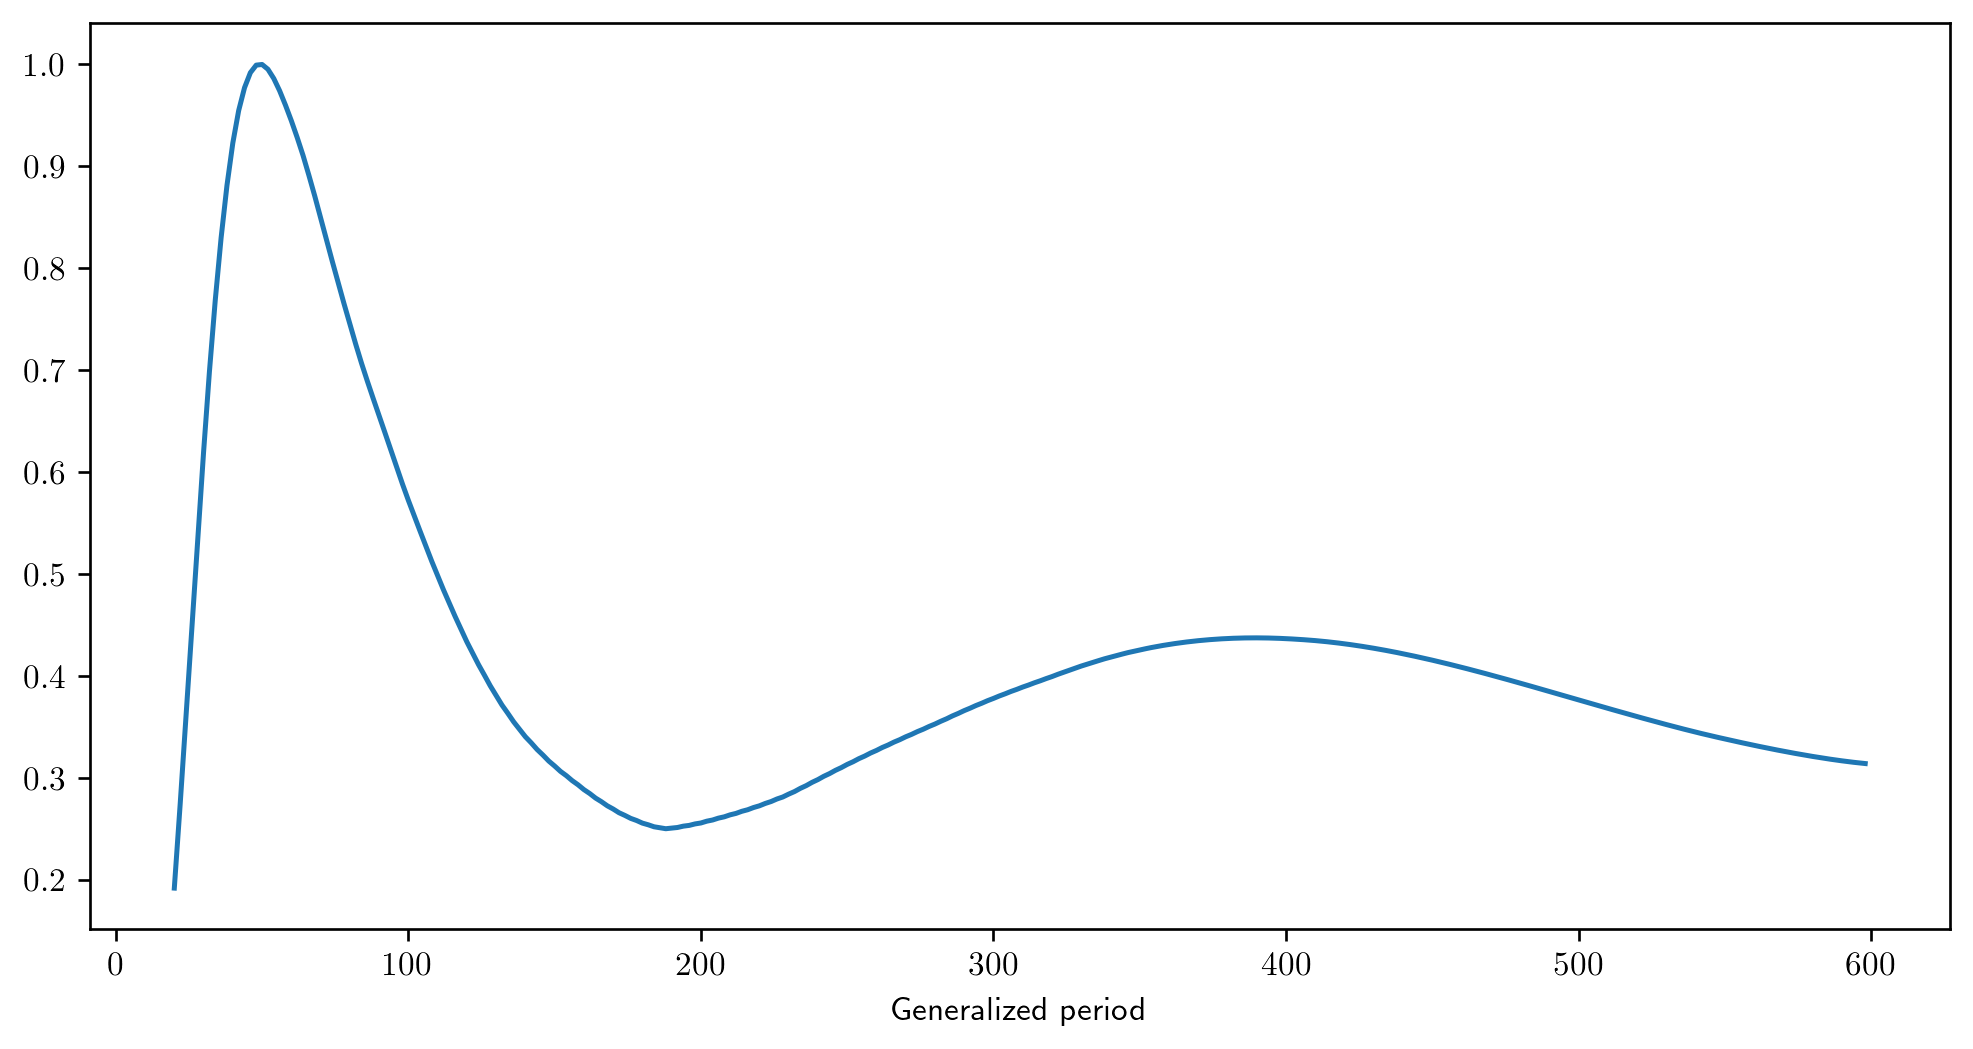

<Figure size 432x288 with 0 Axes>

In [129]:
# t = np.linspace(-1, 1, 601, endpoint=True)
# sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=3)
# sig  = np.cos(2 * np.pi * 7 * t)
# sig  = signal.gausspulse(t - 0.4, fc=2)
# plt.plot(t, sig)
# plt.show()

# s0 = 1
# J = 999
# dj = .0063
# dt = .05

a_start = 5
a_stop = 150
a_step = .5
widths = np.arange(a_start, a_stop, a_step)


for index in range(0, 10):
    arMean = np.ones(len(T[:, index])) * np.mean(T[:, index])
    sig = T[:, index] - arMean
    print(arMean[5])
    cwtmatr = signal.cwt(sig, signal.ricker, widths)
#     cwtmatr, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(sig, dt, dj, s0, J, wavelet=wavelet.Morlet())
    cwtmatr = np.abs(cwtmatr)#[:, 500:1900])
#     print(np.shape(cwtmatr))
    cwtmatr = cwtmatr / np.max(cwtmatr)
    cwtmatr = pywt.threshold(cwtmatr, .2, 'soft')




    spectre = np.sum(cwtmatr, axis = 1)
#     print(spectre)
    spectre = spectre / np.max(spectre)









#     fig, ax = plt.subplots(figsize=(10, 5), dpi=240)
# #     plt.imshow(cwtmatr, extent=[500, 1900, len(scales), 0], cmap='gist_gray', aspect='auto',
# #                    vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
#     plt.imshow(cwtmatr, extent=[500, 1900, a_stop*4, a_start*4], cmap='gist_gray', aspect='auto',
#                    vmax=abs(cwtmatr).max(), vmin=abs(cwtmatr).min())
#     plt.colorbar()
# #     plt.(figsize=(20, 10), dpi=120)
# #     plt.tight_layout()
#     plt.xlabel(r'Timeshift')
#     plt.ylabel(r'Generalized period')
# #     plt.draw()
#     plt.show()
# #     plt.savefig('plots/' + repr(index) + '_WVT.png')
#     plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(10, 5), dpi=240)
    plt.plot(widths*4, spectre)
    plt.xlabel(r'Generalized period')
#     plt.ylabel(r'')
    plt.show()
#     plt.savefig('plots/' + repr(index) + '_WVT_spectre.png')
    plt.clf()